Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load the data from CSV

In [2]:
data= pd.read_csv("Advertising.csv")

Preprocessing and Data cleaning

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data['TV']=data['TV'].astype('int')
data['Radio']=data['Radio'].astype('int')
data['Newspaper']=data['Newspaper'].astype('int')
data['Sales']=data['Sales'].astype('int')
data.head()

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.00000,200.000000,200.000000
mean,146.570000,22.79000,30.100000,13.540000
std,85.824731,14.82582,21.769233,5.253226
min,0.000000,0.00000,0.000000,1.000000
25%,73.750000,9.75000,12.000000,10.000000
50%,149.000000,22.50000,25.000000,12.000000
75%,218.250000,36.00000,45.000000,17.000000
max,296.000000,49.00000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   Radio      200 non-null    int64
 2   Newspaper  200 non-null    int64
 3   Sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data[data.duplicated()]

,TV,Radio,Newspaper,Sales


Data Visualization

<Axes: >

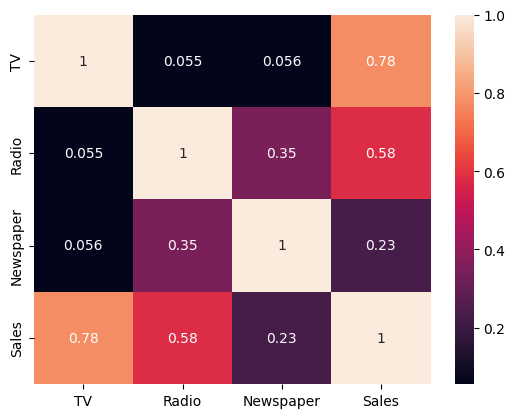

In [10]:
sns.heatmap(data.corr(),annot=True)

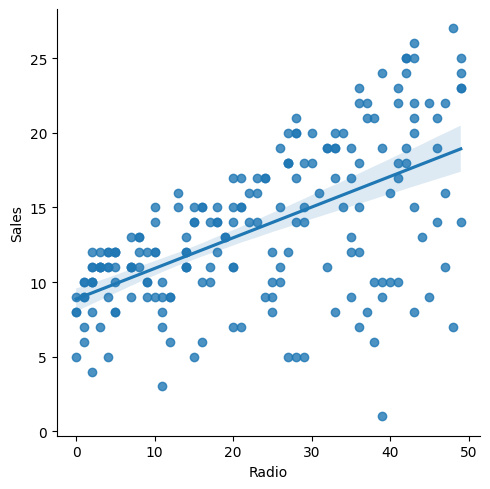

In [11]:
sns.lmplot(data=data,x='Radio',y="Sales")

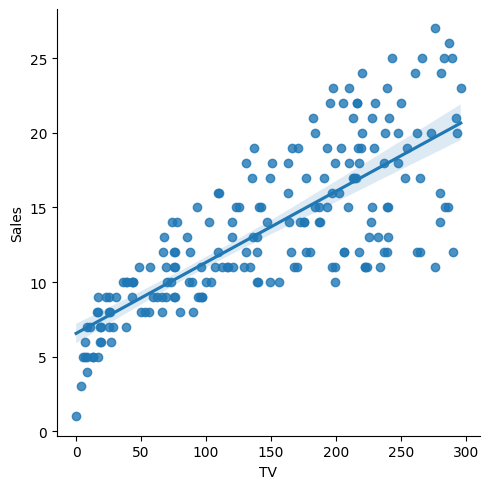

In [12]:
sns.lmplot(data=data,x='TV',y="Sales")

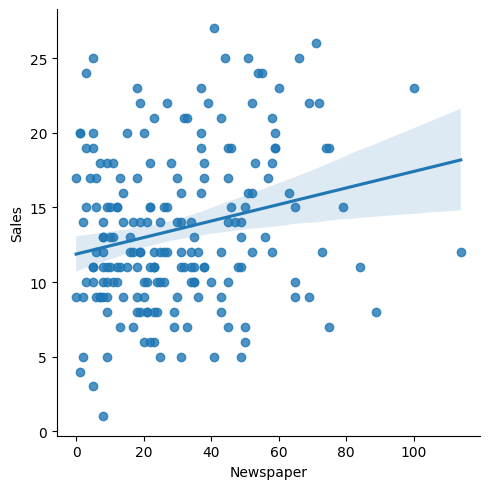

In [13]:
sns.lmplot(data=data,x='Newspaper',y="Sales")

Split the dataset into training and testing sets

In [14]:
X = data[['TV', 'Newspaper', 'Radio']]  # Advertising expenses
y = data['Sales']  # Target variable (sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions on the test set

In [16]:
y_pred = model.predict(X_test)

Print Mean Squared Error and R-squared

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2*100}")


Mean Squared Error: 0.6498133333333336
R-squared: 97.59948281700547
